In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from fastparquet import ParquetFile

In [2]:
data =ParquetFile(r'.\data\complaints.parquet')
data1 = data.to_pandas()
data1.head()

,complaint_id,building_id,bbl,received_date,status,status_date,no_entry_problems,no_violation_problems,violation_problems,problems,no_entry,violation,no_violation
0,6718256,674042,4091190043,2014-01-14,CLOSE,2015-04-02,2.0,0.0,0.0,2,1,0,0
1,6754677,381873,3031740038,2014-01-28,CLOSE,2015-04-14,0.0,2.0,1.0,3,0,1,0
2,6876481,222859,3019600045,2014-04-07,CLOSE,2015-04-24,1.0,0.0,0.0,1,1,0,0
3,6891726,530514,4033210063,2014-04-22,CLOSE,2015-04-14,1.0,0.0,0.0,1,1,0,0
4,6901184,119698,2023730023,2014-04-28,CLOSE,2015-04-28,0.0,2.0,0.0,2,0,0,1


In [3]:
len(data1[data1['status']=='OPEN'])

107

In [4]:
data1[['status_date','complaint_id']].groupby(by=data1.status_date.dt.year).count()

,status_date,complaint_id
status_date,,
2005,2,2
2006,6,6
2007,8,8
2008,7,7
2009,39,39
2010,5,5
2011,1,1
2013,1,1
2014,6367,6367


In [5]:
data2015_ = data1[(data1.received_date.dt.year>=2015)&(data1.status_date.dt.year>=2015)&(data1.status=='CLOSE')]
data2015_

,complaint_id,building_id,bbl,received_date,status,status_date,no_entry_problems,no_violation_problems,violation_problems,problems,no_entry,violation,no_violation
6,7419246,693440,4050437501,2015-04-01,CLOSE,2015-04-06,0.0,1.0,0.0,1,0,0,1
7,7419249,873762,2046600159,2015-04-01,CLOSE,2015-04-10,1.0,0.0,0.0,1,1,0,0
8,7419403,883806,2033220057,2015-04-01,CLOSE,2015-04-14,0.0,1.0,0.0,1,0,0,1
9,7419421,40518,1017300009,2015-04-01,CLOSE,2015-09-09,2.0,0.0,0.0,2,1,0,0
10,7419447,873260,3014350054,2015-04-01,CLOSE,2015-04-11,0.0,1.0,0.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107836,10492608,930770,2047120001,2021-03-23,CLOSE,2021-05-14,1.0,0.0,0.0,1,1,0,0
107837,10640064,4172,1020450092,2021-04-15,CLOSE,2021-04-22,0.0,1.0,0.0,1,0,0,1
107838,10580963,83653,2028690005,2021-04-08,CLOSE,2021-05-03,0.0,2.0,0.0,2,0,0,1
107839,10700808,65175,2026100012,2021-04-29,CLOSE,2021-05-15,0.0,0.0,1.0,1,0,1,0


In [6]:
data2015_['Response_time'] = data2015_.apply(lambda x: (x['status_date']-x['received_date']).days,axis=1)
data2015_

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,complaint_id,building_id,bbl,received_date,status,status_date,no_entry_problems,no_violation_problems,violation_problems,problems,no_entry,violation,no_violation,Response_time
6,7419246,693440,4050437501,2015-04-01,CLOSE,2015-04-06,0.0,1.0,0.0,1,0,0,1,5
7,7419249,873762,2046600159,2015-04-01,CLOSE,2015-04-10,1.0,0.0,0.0,1,1,0,0,9
8,7419403,883806,2033220057,2015-04-01,CLOSE,2015-04-14,0.0,1.0,0.0,1,0,0,1,13
9,7419421,40518,1017300009,2015-04-01,CLOSE,2015-09-09,2.0,0.0,0.0,2,1,0,0,161
10,7419447,873260,3014350054,2015-04-01,CLOSE,2015-04-11,0.0,1.0,0.0,1,0,0,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107836,10492608,930770,2047120001,2021-03-23,CLOSE,2021-05-14,1.0,0.0,0.0,1,1,0,0,52
107837,10640064,4172,1020450092,2021-04-15,CLOSE,2021-04-22,0.0,1.0,0.0,1,0,0,1,7
107838,10580963,83653,2028690005,2021-04-08,CLOSE,2021-05-03,0.0,2.0,0.0,2,0,0,1,25
107839,10700808,65175,2026100012,2021-04-29,CLOSE,2021-05-15,0.0,0.0,1.0,1,0,1,0,16


Text(0.5, 1.0, '2015-2021 Monthly Average Response Time')

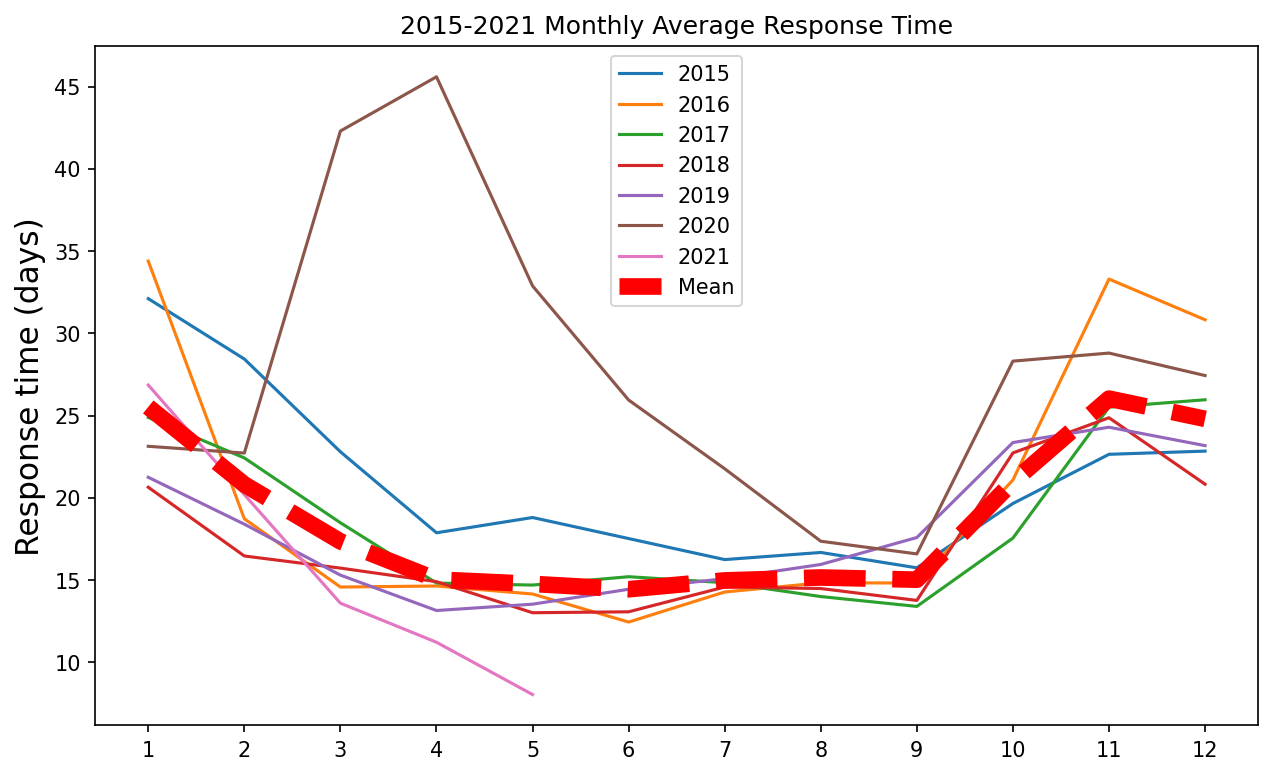

In [49]:
years = list(range(2015,2022))
plt.figure(figsize=(10,6),dpi=150)
for i in years:
    data = data2015_[data2015_.received_date.dt.year==i]
    response = data[['Response_time']].groupby(by=data.received_date.dt.month).mean()
    plt.plot(response,label=i)
data_before_2020 = data2015_[data2015_.received_date.dt.year<2020]
response_before_2020 = data_before_2020[['Response_time']].groupby(by=data_before_2020.received_date.dt.month).mean()
plt.plot(response_before_2020,'r--',linewidth=8,label='Mean')
plt.legend()
plt.xticks(np.arange(1, 13, 1))
plt.ylabel('Response time (days)',size=15)
plt.title('2015-2021 Monthly Average Response Time')

Text(0.5, 1.0, '2015-2021 Monthly Total Inspections')

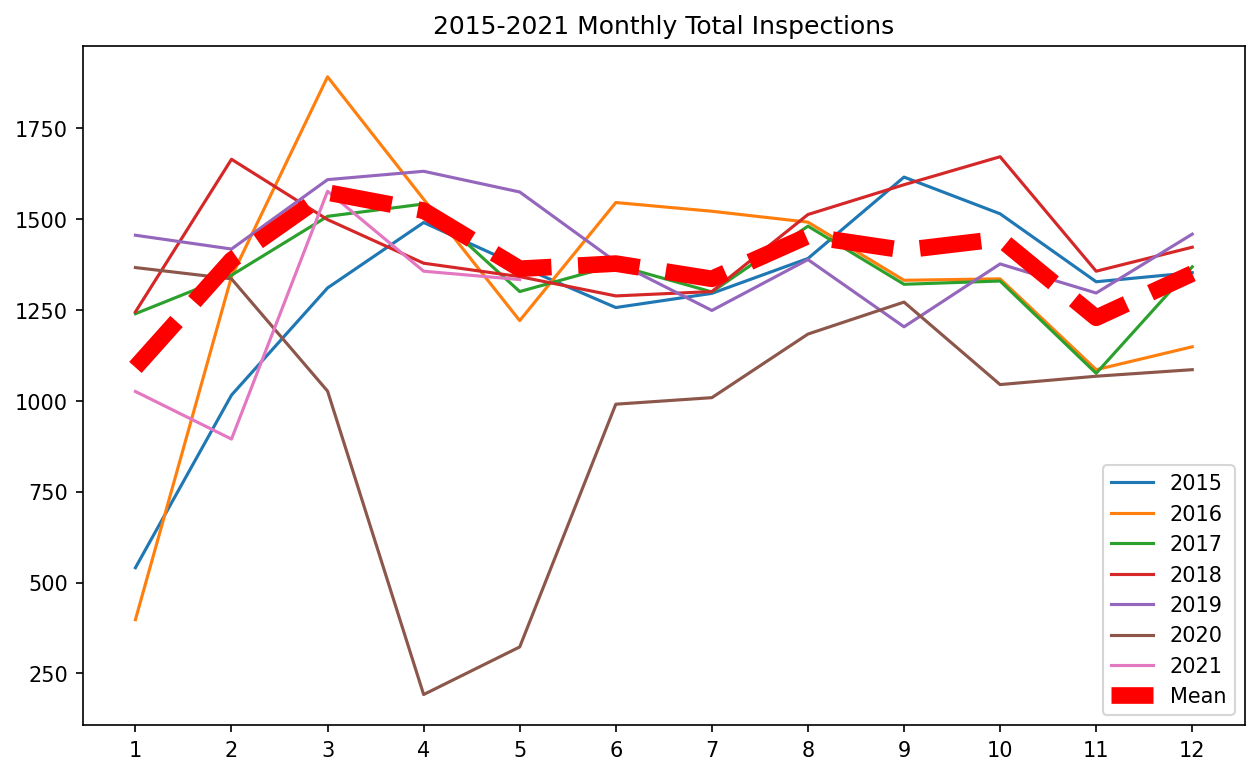

In [48]:
plt.figure(figsize=(10,6),dpi=150)
for i in years:
    data = data2015_[data2015_.status_date.dt.year==i]
    response = data[['complaint_id']].groupby(by=data.status_date.dt.month).count()
    plt.plot(response,label=i)
data_before_2020 = data2015_[data2015_.received_date.dt.year<2020]
response_before_2020 = data_before_2020[['complaint_id']].groupby(by=data_before_2020.status_date.dt.month).count()/5
plt.plot(response_before_2020,'r--',linewidth=8,label='Mean')
plt.legend()
plt.xticks(np.arange(1, 13, 1))
plt.title('2015-2021 Monthly Total Inspections')

Text(0.5, 1.0, '2015-2021 Monthly Inspector No-entry Rate')

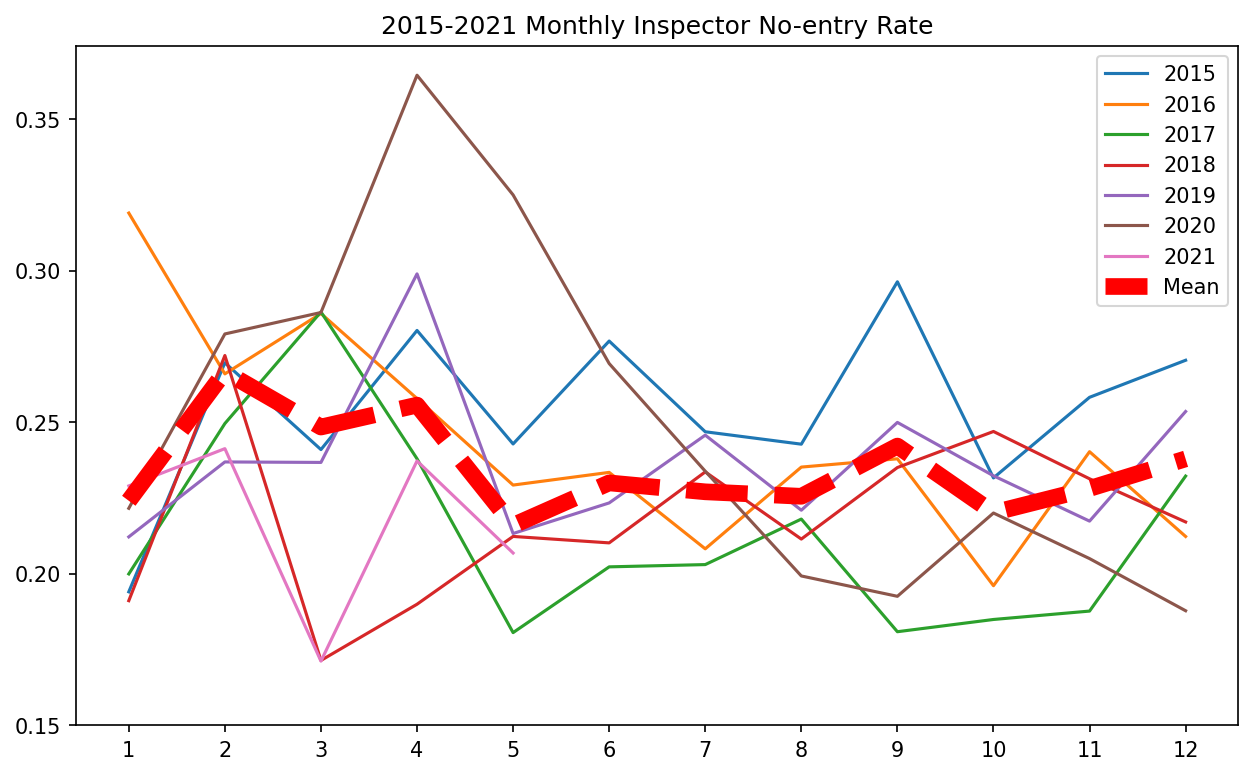

In [42]:
plt.figure(figsize=(10,6),dpi=150)
for i in years:
    data = data2015_[data2015_.status_date.dt.year==i]
    response = data[['no_entry']].groupby(by=data.status_date.dt.month).apply(lambda x :x.sum()/len(x))
    plt.plot(response,label=i)
data_before_2020 = data2015_[data2015_.received_date.dt.year<2020]
response_before_2020 = data_before_2020[['no_entry']].groupby(by=data_before_2020.status_date.dt.month).apply(lambda x :x.sum()/len(x))
plt.plot(response_before_2020,'r--',linewidth=8,label='Mean')
plt.legend()
plt.yticks(np.arange(0.15, 0.4,0.05))
plt.xticks(np.arange(1, 13, 1))
plt.title('2015-2021 Monthly Inspector No-entry Rate')

Text(0.5, 1.0, '2015-2021 Monthly Inspector Hit Rate')

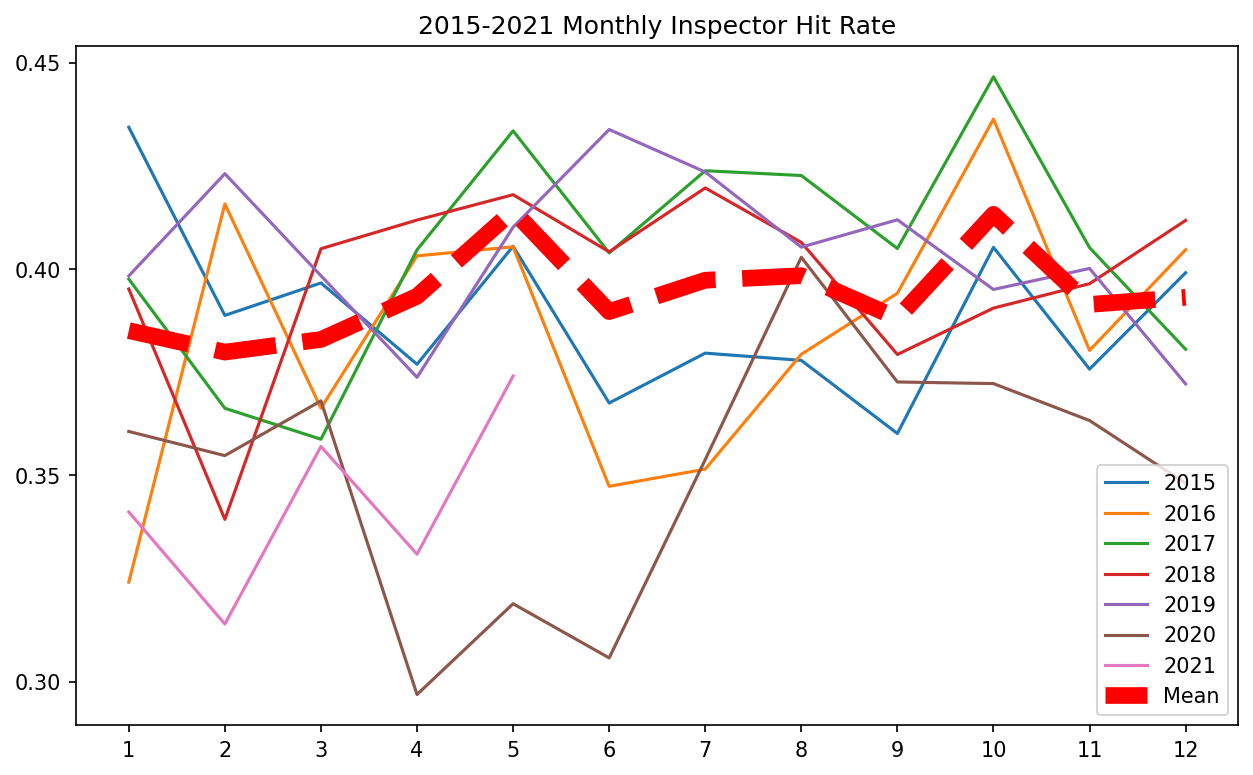

In [43]:
plt.figure(figsize=(10,6),dpi=150)
for i in years:
    data = data2015_[data2015_.status_date.dt.year==i]
    response = data[['violation']].groupby(by=data.status_date.dt.month).apply(lambda x :x.sum()/len(x))
    plt.plot(response,label=i)
data_before_2020 = data2015_[data2015_.received_date.dt.year<2020]
response_before_2020 =  data_before_2020[['violation']].groupby(by=data_before_2020.status_date.dt.month).apply(lambda x :x.sum()/len(x))
plt.plot(response_before_2020,'r--',linewidth=8,label='Mean')
plt.legend()
plt.xticks(np.arange(1, 13, 1))
plt.yticks(np.arange(0.3, 0.45,0.05))
plt.title('2015-2021 Monthly Inspector Hit Rate')

Text(0.5, 1.0, '2015-2021 Monthly Inspector Hit Rate When Allowing Entry')

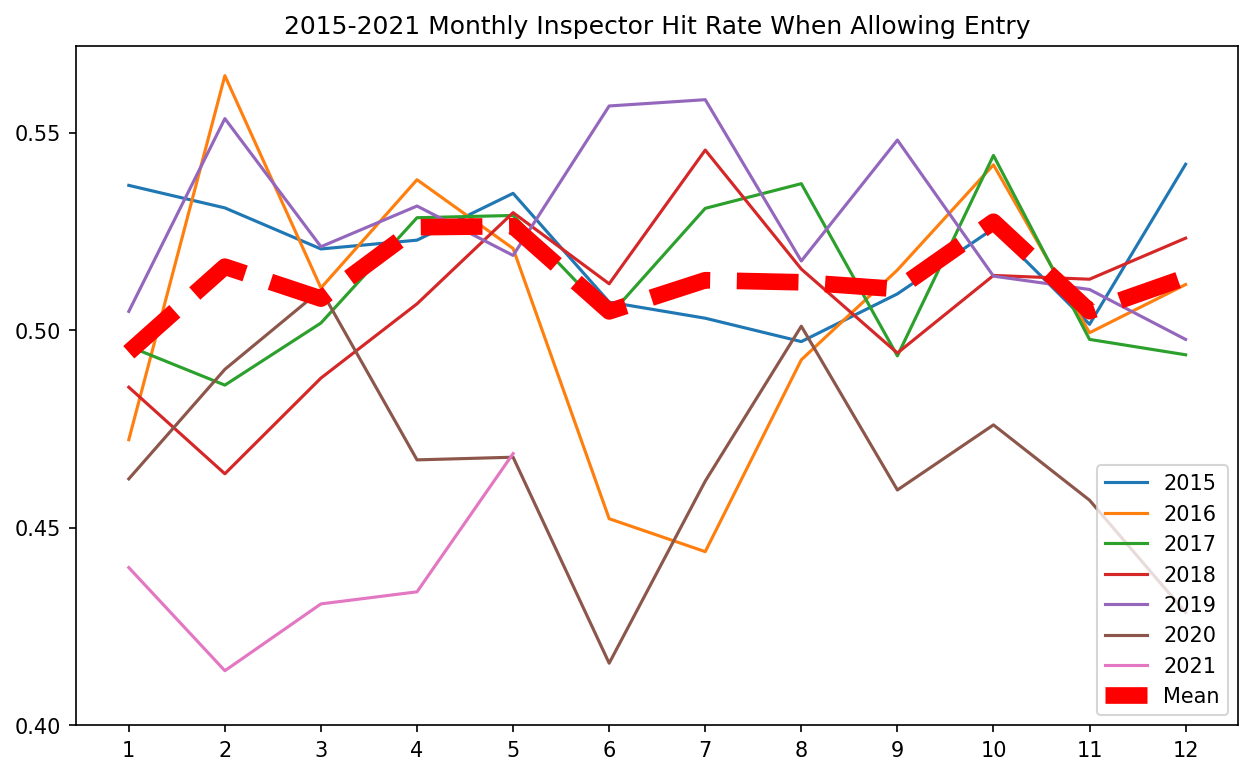

In [44]:
plt.figure(figsize=(10,6),dpi=150)
for i in years:
    data = data2015_[(data2015_.status_date.dt.year==i)&(data2015_.no_entry==0)]
    response = data[['violation']].groupby(by=data.status_date.dt.month).apply(lambda x :x.sum()/len(x))
    plt.plot(response,label=i)
data_before_2020 = data2015_[(data2015_.received_date.dt.year<2020)&(data2015_.no_entry==0)]
response_before_2020 = data_before_2020[['violation']].groupby(by=data_before_2020.status_date.dt.month).apply(lambda x :x.sum()/len(x))
plt.plot(response_before_2020,'r--',linewidth=8,label='Mean')
plt.legend()
plt.xticks(np.arange(1, 13, 1))
plt.yticks(np.arange(0.4, 0.55,0.05))
plt.title('2015-2021 Monthly Inspector Hit Rate When Allowing Entry')